In [1]:
DRAW = True

## Dev parameters

In [2]:
import sys
sys.path.insert(1, '../')

# get trainer.
from src.Trainer import Trainer

2023-08-13 16:31:55.680612: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-13 16:31:55.782507: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-13 16:31:55.783492: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-13 16:31:56.822205: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# IMPORTS

In [3]:
# data visualization.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# confere data.
import sklearn.metrics
import cv2
import natsort

# logger.
import pickle
import mlflow

# DATASETs

In [4]:
# separate datasets.
trainer = Trainer()
[train_set, val_set] = trainer.train_val_split(augment=True)

Found 892 images belonging to 2 classes.
Training set:
 {'0_utilizavel': 0, '1_defeituoso': 1}
Found 222 images belonging to 2 classes.

Validation set:
 {'0_utilizavel': 0, '1_defeituoso': 1}


# FP MODEL

## Train

In [5]:
trainer.build_fp_model()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 2)       20        
                                                                 
 average_pooling2d (Average  (None, 64, 64, 2)         0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 4)         76        
                                                                 
 average_pooling2d_1 (Avera  (None, 32, 32, 4)         0         
 gePooling2D)                                                    
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 4)         148       
                                                                 
 average_pooling2d_2 (Avera  (None, 16, 16, 4)         0

In [6]:
trainer.training_loop()

2023/08/13 16:31:59 WARNING mlflow.tensorflow: Unrecognized dataset type <class 'keras.src.preprocessing.image.DirectoryIterator'>. Dataset logging skipped.
2023/08/13 16:31:59 WARNING mlflow.tensorflow: Unrecognized dataset type <class 'keras.src.preprocessing.image.DirectoryIterator'>. Dataset logging skipped.


Epoch 1/80
56/56 - 8s - loss: 0.6431 - recall: 0.9496 - binary_accuracy: 0.6256 - precision: 0.6238 - false_negatives: 27.0000 - false_positives: 307.0000 - val_loss: 0.6046 - val_recall: 0.8358 - val_binary_accuracy: 0.6622 - val_precision: 0.6788 - val_false_negatives: 22.0000 - val_false_positives: 53.0000 - 8s/epoch - 135ms/step
Epoch 2/80


/home/vuser/Documents/backup_07302023/3_tcc_code/ML_IoT_pipeline/ML_IoT_pipeline/env_ML_pipeline/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


56/56 - 4s - loss: 0.5856 - recall: 0.8153 - binary_accuracy: 0.6984 - precision: 0.7199 - false_negatives: 99.0000 - false_positives: 170.0000 - val_loss: 0.6476 - val_recall: 0.8657 - val_binary_accuracy: 0.6036 - val_precision: 0.6237 - val_false_negatives: 18.0000 - val_false_positives: 70.0000 - 4s/epoch - 64ms/step
Epoch 3/80
56/56 - 4s - loss: 0.5523 - recall: 0.8022 - binary_accuracy: 0.7276 - precision: 0.7584 - false_negatives: 106.0000 - false_positives: 137.0000 - val_loss: 0.5839 - val_recall: 0.7910 - val_binary_accuracy: 0.7387 - val_precision: 0.7794 - val_false_negatives: 28.0000 - val_false_positives: 30.0000 - 4s/epoch - 67ms/step
Epoch 4/80
56/56 - 4s - loss: 0.5367 - recall: 0.8134 - binary_accuracy: 0.7422 - precision: 0.7703 - false_negatives: 100.0000 - false_positives: 130.0000 - val_loss: 0.5461 - val_recall: 0.7687 - val_binary_accuracy: 0.7027 - val_precision: 0.7464 - val_false_negatives: 31.0000 - val_false_positives: 35.0000 - 4s/epoch - 77ms/step
Epoch 5

2023/08/13 16:36:58 WARNING mlflow.tensorflow: Failed to infer model signature: could not sample data to infer model signature: '>=' not supported between instances of 'slice' and 'int'
2023/08/13 16:36:58 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


INFO:tensorflow:Assets written to: /tmp/tmpesp_ajq8/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmpesp_ajq8/model/data/model/assets


In [7]:
trainer.load_model_trained()

## Results evaluation

In [8]:
# turn off data augmentation to reproducible results.
[train_set, val_set] = trainer.train_val_split(augment=False)

Found 892 images belonging to 2 classes.
Training set:
 {'0_utilizavel': 0, '1_defeituoso': 1}
Found 222 images belonging to 2 classes.

Validation set:
 {'0_utilizavel': 0, '1_defeituoso': 1}


56/56 [==============================] - 1s 23ms/step
fp_Train_Metrics
 {'fp_Train_recall': 0.9776119402985075, 'fp_Train_acc': 0.9854260089686099, 'fp_Train_precision': 0.9980952380952381}
Confusion matrix Train 
 [[355   1]
 [ 12 524]]
56/56 [==============================] - 1s 24ms/step
Errors list Train 
 ['../dataset/resize_128/train/0_utilizavel/utiliza (216).jpeg', '../dataset/resize_128/train/1_defeituoso/defeito (289).jpeg', '../dataset/resize_128/train/1_defeituoso/defeito (434).jpeg', '../dataset/resize_128/train/1_defeituoso/defeito (439).jpeg', '../dataset/resize_128/train/1_defeituoso/defeito (469).jpeg', '../dataset/resize_128/train/1_defeituoso/defeito (516).jpeg', '../dataset/resize_128/train/1_defeituoso/defeito (53).jpeg', '../dataset/resize_128/train/1_defeituoso/defeito (613).jpeg', '../dataset/resize_128/train/1_defeituoso/defeito (615).jpeg', '../dataset/resize_128/train/1_defeituoso/defeito (642).jpeg', '../dataset/resize_128/train/1_defeituoso/defeito (74).jpe

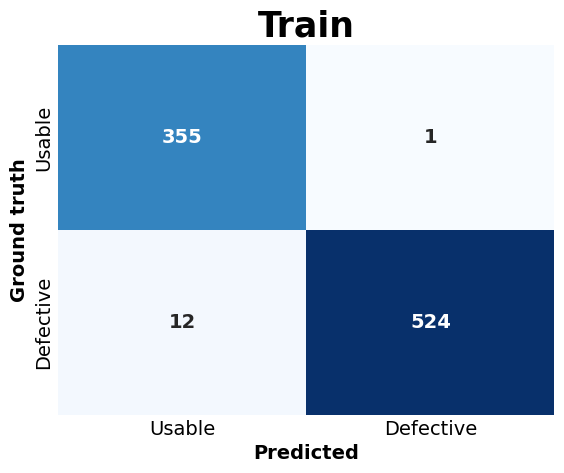

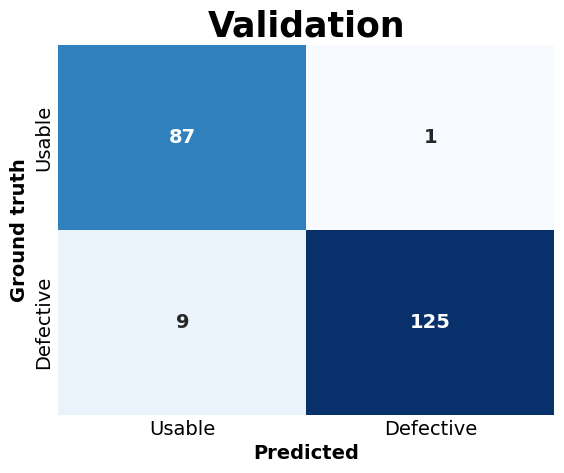

In [9]:
# get confusion matrix and wrong inferences.
trainer.init_metrics_handler()
for name, set in zip(["Train", "Validation"], [train_set, val_set]):
    trainer.get_confusion_matrix(set, name, "fp")
    trainer.get_errors(set, name, "fp", draw_errors=DRAW)

# QT MODEL

## Build

In [10]:
# build qt model.
trainer.build_qt_model()

INFO:tensorflow:Assets written to: /tmp/tmp9gf0kmc3/assets


INFO:tensorflow:Assets written to: /tmp/tmp9gf0kmc3/assets
/home/vuser/Documents/backup_07302023/3_tcc_code/ML_IoT_pipeline/ML_IoT_pipeline/env_ML_pipeline/lib/python3.9/site-packages/tensorflow/lite/python/convert.py:887: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn(
2023-08-13 16:37:11.371134: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
2023-08-13 16:37:11.371162: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
2023-08-13 16:37:11.371497: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /tmp/tmp9gf0kmc3
2023-08-13 16:37:11.373755: I tensorflow/cc/saved_model/reader.cc:91] Reading meta graph with tags { serve }
2023-08-13 16:37:11.373772: I tensorflow/cc/saved_model/reader.cc:132] Reading SavedModel debug info (if present) from: /tmp/tmp9gf0kmc3
2023-08-13 16:37:11.379875: I tensorflow/compi

QT model detais:
input details = {'name': 'serving_default_conv2d_input:0', 'index': 0, 'shape': array([  1, 128, 128,   1], dtype=int32), 'shape_signature': array([ -1, 128, 128,   1], dtype=int32), 'dtype': <class 'numpy.int8'>, 'quantization': (1.0, -128), 'quantization_parameters': {'scales': array([1.], dtype=float32), 'zero_points': array([-128], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}
output details = {'name': 'StatefulPartitionedCall:0', 'index': 25, 'shape': array([1, 1], dtype=int32), 'shape_signature': array([-1,  1], dtype=int32), 'dtype': <class 'numpy.int8'>, 'quantization': (0.00390625, -128), 'quantization_parameters': {'scales': array([0.00390625], dtype=float32), 'zero_points': array([-128], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}


fully_quantize: 0, inference_type: 6, input_inference_type: INT8, output_inference_type: INT8


b' \x00\x00\x00TFL3\x00\x00\x00\x00\x14\x00 \x00\x1c\x00\x18\x00\x14\x00\x10\x00\x0c\x00\x00\x00\x08\x00\x04\x00\x14\x00\x00\x00\x1c\x00\x00\x00\x88\x00\x00\x00\xe0\x00\x00\x00\xd0\r\x00\x00\xe0\r\x00\x00d#\x00\x00\x03\x00\x00\x00\x01\x00\x00\x00\x04\x00\x00\x00n\xf1\xff\xff\x0c\x00\x00\x00\x1c\x00\x00\x008\x00\x00\x00\x0f\x00\x00\x00serving_default\x00\x01\x00\x00\x00\x04\x00\x00\x00\x94\xff\xff\xff\x19\x00\x00\x00\x04\x00\x00\x00\x05\x00\x00\x00dense\x00\x00\x00\x01\x00\x00\x00\x04\x00\x00\x00\xb6\xf2\xff\xff\x04\x00\x00\x00\x0c\x00\x00\x00conv2d_input\x00\x00\x00\x00\x02\x00\x00\x004\x00\x00\x00\x04\x00\x00\x00\xdc\xff\xff\xff\x1c\x00\x00\x00\x04\x00\x00\x00\x13\x00\x00\x00CONVERSION_METADATA\x00\x08\x00\x0c\x00\x08\x00\x04\x00\x08\x00\x00\x00\x1b\x00\x00\x00\x04\x00\x00\x00\x13\x00\x00\x00min_runtime_version\x00\x1d\x00\x00\x00\xec\x0c\x00\x00\xe4\x0c\x00\x00\xcc\x0c\x00\x00\xb0\x0c\x00\x00\xa0\x08\x00\x00P\x08\x00\x00\xc0\x03\x00\x00\x90\x03\x00\x00`\x02\x00\x00@\x02\x00\x00\xa0\x

## Compare QT and FP models

In [11]:
trainer.quantization_error(train_set)

56/56 [==============================] - 1s 25ms/step


INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


qt_Metrics
 {'qt_mean': -0.0003160142, 'qt_std': 0.013934195, 'qt_abs_mean': 0.0064368728, 'qt_abs_std': 0.012362375}


{'diff': array([ 2.97892615e-02,  1.22667551e-02,  6.30701333e-03, -4.49091516e-04,
         1.10760406e-02, -2.12855492e-04, -5.02051145e-04, -4.13034111e-03,
        -9.47297551e-04, -1.30986085e-03,  9.54515301e-04,  8.57074559e-03,
         6.40138984e-04,  8.90458934e-03,  3.55568156e-03,  7.31257349e-03,
        -1.62634626e-03,  7.45987147e-03, -1.59757934e-03, -4.32167202e-04,
        -3.78071330e-04, -8.80599895e-04,  2.44005024e-03, -4.11758199e-03,
        -2.87301838e-04,  9.24190506e-04,  1.01682171e-03,  1.38047449e-02,
         2.46734172e-02,  2.18170602e-03,  8.78435187e-03,  2.94609182e-03,
        -2.64702830e-04,  2.32616439e-03,  1.57986139e-03, -4.86076251e-03,
         2.82289227e-04, -1.04479492e-03, -1.19402539e-03, -1.39851676e-04,
        -1.18922046e-03, -8.10410827e-04,  7.15390444e-02,  4.27989289e-06,
         1.87923317e-03, -5.62365982e-04, -3.42722517e-04,  1.66728161e-04,
        -6.71201199e-03,  2.00843364e-02, -3.06144735e-04, -7.56118447e-04,
    

## Evaluate results

qt_Train_Metrics
 {'qt_Train_recall': 0.9757462686567164, 'qt_Train_acc': 0.984304932735426, 'qt_Train_precision': 0.9980916030534351}
Confusion matrix Train 
 [[355   1]
 [ 13 523]]
Errors list Train 
 ['../dataset/resize_128/train/0_utilizavel/utiliza (216).jpeg', '../dataset/resize_128/train/1_defeituoso/defeito (289).jpeg', '../dataset/resize_128/train/1_defeituoso/defeito (366).jpeg', '../dataset/resize_128/train/1_defeituoso/defeito (434).jpeg', '../dataset/resize_128/train/1_defeituoso/defeito (439).jpeg', '../dataset/resize_128/train/1_defeituoso/defeito (469).jpeg', '../dataset/resize_128/train/1_defeituoso/defeito (516).jpeg', '../dataset/resize_128/train/1_defeituoso/defeito (53).jpeg', '../dataset/resize_128/train/1_defeituoso/defeito (613).jpeg', '../dataset/resize_128/train/1_defeituoso/defeito (615).jpeg', '../dataset/resize_128/train/1_defeituoso/defeito (642).jpeg', '../dataset/resize_128/train/1_defeituoso/defeito (74).jpeg', '../dataset/resize_128/train/1_defeituoso/

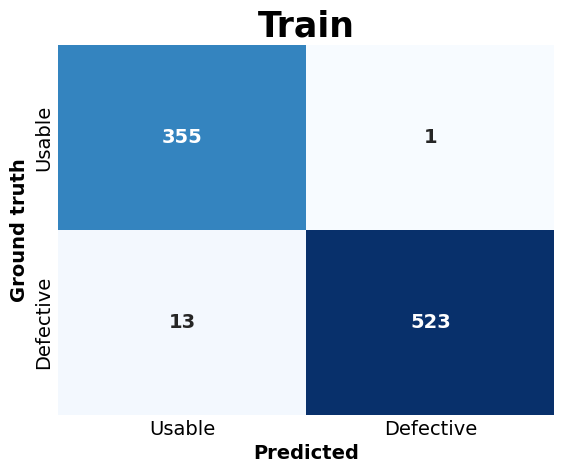

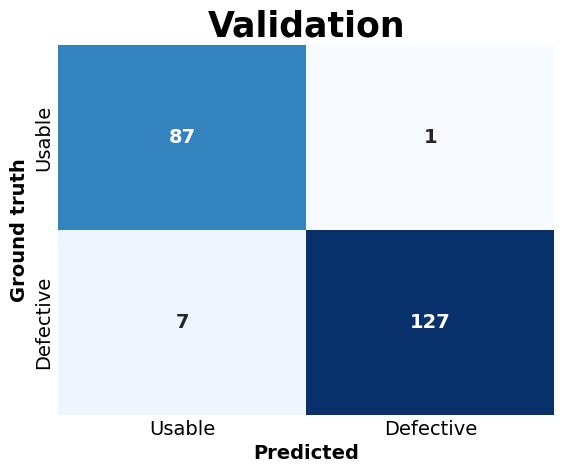

In [12]:
for name, set in zip(["Train", "Validation"], [train_set, val_set]):
    trainer.get_confusion_matrix(set, name, "qt")
    trainer.get_errors(set, name, "qt", draw_errors=DRAW)

# TEST DATASET

In [13]:
# test results.
test_set = trainer.test_set_gen()

Found 183 images belonging to 2 classes.
Test set:
 {'0_utilizavel': 0, '1_defeituoso': 1}


## FP model

12/12 [==============================] - 1s 32ms/step
fp_Test_Metrics
 {'fp_Test_recall': 0.9454545454545454, 'fp_Test_acc': 0.9453551912568307, 'fp_Test_precision': 0.9629629629629629}
Confusion matrix Test 
 [[ 69   4]
 [  6 104]]
12/12 [==============================] - 0s 23ms/step
Errors list Test 
 ['../dataset/resize_128/test/0_utilizavel/utiliza (460).jpeg', '../dataset/resize_128/test/0_utilizavel/utiliza (461).jpeg', '../dataset/resize_128/test/0_utilizavel/utiliza (471).jpeg', '../dataset/resize_128/test/0_utilizavel/utiliza (517).jpeg', '../dataset/resize_128/test/1_defeituoso/defeito (672).jpeg', '../dataset/resize_128/test/1_defeituoso/defeito (680).jpeg', '../dataset/resize_128/test/1_defeituoso/defeito (712).jpeg', '../dataset/resize_128/test/1_defeituoso/defeito (735).jpeg', '../dataset/resize_128/test/1_defeituoso/defeito (767).jpeg', '../dataset/resize_128/test/1_defeituoso/defeito (773).jpeg']


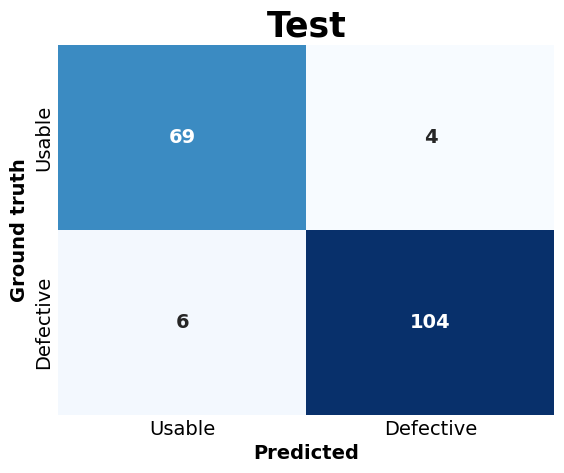

In [14]:
trainer.get_confusion_matrix(test_set, "Test", "fp")
trainer.get_errors(test_set, "Test", "fp", draw_errors=True)

## QT model

qt_Test_Metrics
 {'qt_Test_recall': 0.9545454545454546, 'qt_Test_acc': 0.9508196721311475, 'qt_Test_precision': 0.963302752293578}
Confusion matrix Test 
 [[ 69   4]
 [  5 105]]
Errors list Test 
 ['../dataset/resize_128/test/0_utilizavel/utiliza (460).jpeg', '../dataset/resize_128/test/0_utilizavel/utiliza (461).jpeg', '../dataset/resize_128/test/0_utilizavel/utiliza (471).jpeg', '../dataset/resize_128/test/0_utilizavel/utiliza (517).jpeg', '../dataset/resize_128/test/1_defeituoso/defeito (672).jpeg', '../dataset/resize_128/test/1_defeituoso/defeito (712).jpeg', '../dataset/resize_128/test/1_defeituoso/defeito (735).jpeg', '../dataset/resize_128/test/1_defeituoso/defeito (767).jpeg', '../dataset/resize_128/test/1_defeituoso/defeito (773).jpeg']


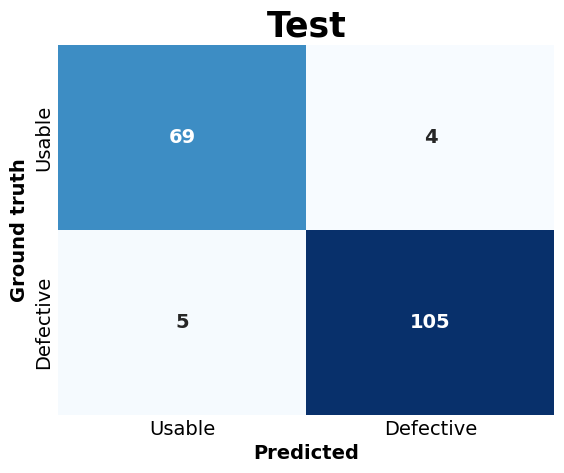

In [15]:
trainer.get_confusion_matrix(test_set, "Test", "qt")
trainer.get_errors(test_set, "Test", "qt", draw_errors=True)

# END LOGGER RUN

In [16]:
trainer.end_run()